In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def readSignal(file):
    signal = np.fromfile(file, sep=' ')
    signal = signal.reshape(-1, 2)
    signal = signal * np.array([1, 1j])
    signal = np.sum(signal, axis=1)
    return signal

In [20]:
signal = readSignal('./txt/signal1.txt')
spectrum = np.fft.fft(signal)

cpp_spectrum_fast = readSignal('./txt/spectrum_fast.txt')
cpp_spectrum_slow = readSignal('./txt/spectrum_slow.txt')

print(f"mse of cpp_spectrum_fast and spectrum: {(np.square(cpp_spectrum_fast - spectrum)).mean()}")
print(f"mse of cpp_spectrum_slow and spectrum: {(np.square(cpp_spectrum_slow - spectrum)).mean()}")

mse of cpp_spectrum_fast and spectrum: (1.695317717779127e-05+4.0101428533912933e-07j)
mse of cpp_spectrum_slow and spectrum: (1.695317717779127e-05+4.0101428533912933e-07j)


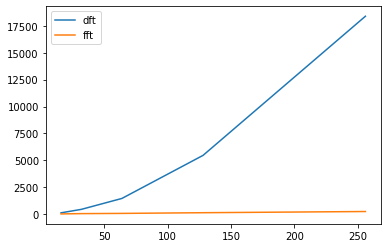

In [21]:
x = np.array([16, 32, 64, 128, 256])
dft = np.array([126, 447, 1462, 5466, 18391])
fft = np.array([24, 51, 72, 136, 247])

plt.plot(x, dft)
plt.plot(x, fft)

plt.legend(['dft', 'fft'])

In [42]:
signal1 = readSignal('./txt/signal1.txt')
signal2 = readSignal('./txt/signal2.txt')

cpp_conv_fast = readSignal('./txt/convolution_fast.txt')
cpp_conv_slow = readSignal('./txt/convolution_slow.txt')

conv = np.convolve(signal1, signal2)

print(f"mse of cpp_conv_fast and conv: {(np.square(cpp_conv_fast - conv)).mean()}")
print(f"mse of cpp_conv_slow and conv: {(np.square(cpp_conv_slow - conv)).mean()}")

mse of cpp_conv_fast and conv: (-1.124881333646086e-05+7.559999990480802e-07j)
mse of cpp_conv_slow and conv: (-1.124881333646086e-05+7.559999990480802e-07j)


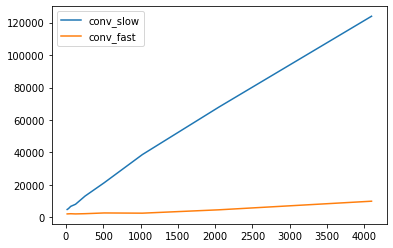

In [43]:
x = np.array([16, 32, 64, 128, 256, 512, 1024, 2048, 4096])
conv_slow = np.array([4875, 5360, 6795, 8082, 13134, 21325, 38692, 67901, 123923])
conv_fast = np.array([2135, 2178, 2246, 2134, 2278, 2727, 2596, 4659, 9967])

plt.plot(x, conv_slow)
plt.plot(x, conv_fast)

plt.legend(['conv_slow', 'conv_fast'])